In [1]:
import pandas as pd

plot_folder = "Churn"
data = pd.read_csv("Churn/Churn.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [2]:
X.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000


In [3]:
y.describe()

count    3150.000000
mean        0.157143
std         0.363993
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

In [4]:
y = y.to_numpy().ravel()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

num_features = X.shape[1]
num_outputs = len(set(y))
num_avg = (num_features + num_outputs) // 2

hidden_layers = [
    (),
    (num_avg,),
    (num_avg, num_avg),
    (num_avg, num_outputs),
    (num_features, num_avg, num_outputs),
]

models = []
y_train_preds, y_test_preds = [], []
acc_train, acc_test = [], []
prec_train, prec_test = [], []
rec_train, rec_test = [], []
f1_train, f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(X_train, y_train)
    models.append(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.894048       0.882540         0.888339   
1          (7,)        0.903968       0.887302         0.906166   
2        (7, 7)        0.946032       0.936508         0.945023   
3        (7, 2)        0.936508       0.923810         0.934218   
4    (13, 7, 2)        0.946429       0.926984         0.946267   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.874892      0.894048     0.882540        0.878640       0.861250  
1        0.887470      0.903968     0.887302        0.888286       0.864161  
2        0.934137      0.946032     0.936508        0.945400       0.933862  
3        0.920909      0.936508     0.923810        0.933528       0.918053  
4        0.925877      0.946429     0.926984        0.946346       0.926368  


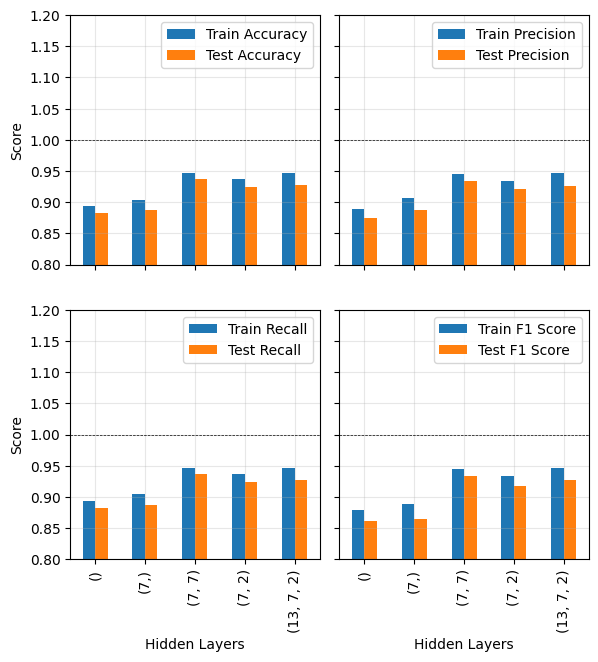

In [7]:
import pandas as pd

results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            acc_train,
            acc_test,
            prec_train,
            prec_test,
            rec_train,
            rec_test,
            f1_train,
            f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.8, 1.2), ylabel="Score"
    )
    ax.grid(alpha=0.3)
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/scores.png", dpi=300)

In [8]:
import shap

shap.initjs()

/home/piotr/Studia/MIO/MIO-Projekt/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
X100 = shap.utils.sample(X_train, 100)

In [10]:
explainer = shap.KernelExplainer(model.predict_proba, X100, feature_names=X.columns)
shap_values = explainer.shap_values(X_test)

100%|██████████| 630/630 [01:15<00:00,  8.36it/s]


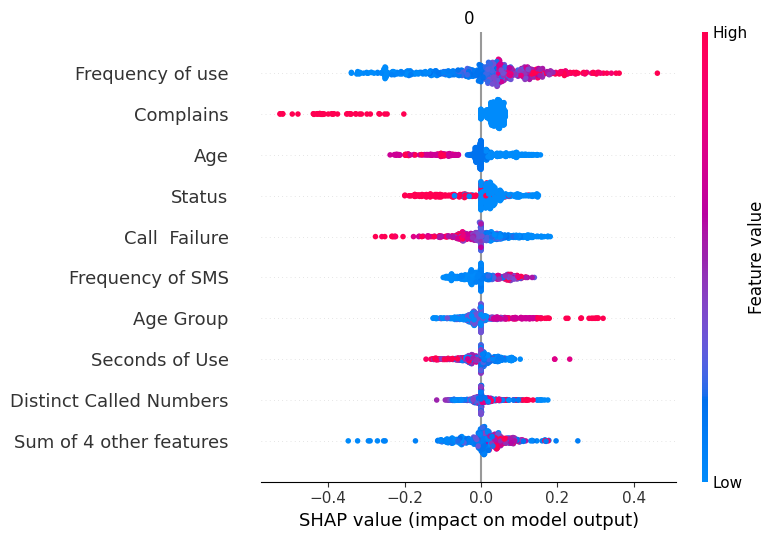

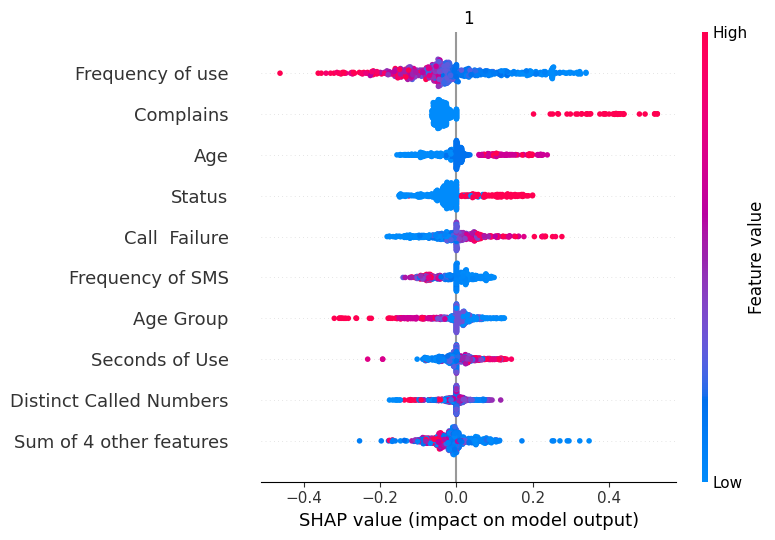

In [11]:
for i, class_name in enumerate(model.classes_):
    per_class_explanation = shap.Explanation(
        shap_values[:, :, i], data=X_test, feature_names=X.columns
    )
    shap.plots.beeswarm(per_class_explanation, show=False, max_display=10)
    plt.gca().set_title(f"{class_name}")
    plt.tight_layout()
    plt.savefig(f"{plot_folder}/per_class_beeswarm_class_{class_name}.png", dpi=300)
    plt.show()

In [12]:
import numpy as np

per_class_mean_abs_shap = {}

for i, class_name in enumerate(model.classes_):
    per_class_mean_abs_shap[class_name] = np.mean(np.abs(shap_values[:, :, i]), axis=0)

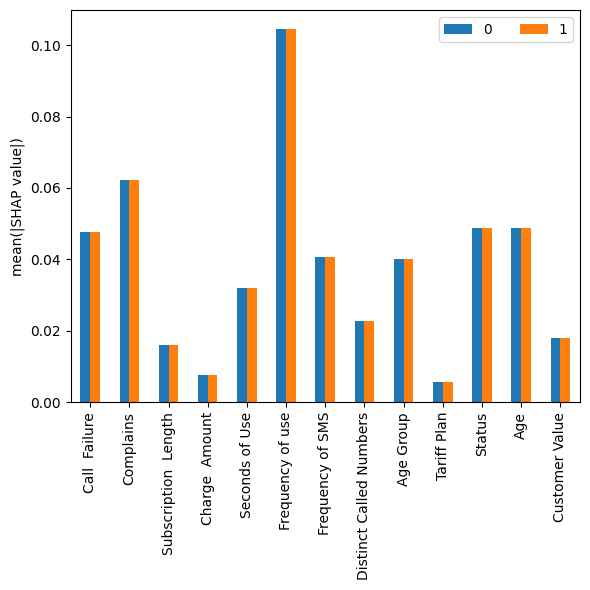

In [13]:
df = pd.DataFrame(per_class_mean_abs_shap)

fig, ax = plt.subplots(figsize=(6, 6))
df.plot.bar(ax=ax)

ax.set_xticklabels(X.columns)
ax.legend(ncols=2)
ax.set_ylabel(r"mean(|SHAP value|)")

plt.tight_layout()
fig.savefig(f"{plot_folder}/per_class_mean_abs_shap.png", dpi=300)
plt.show()

In [14]:
preds = model.predict(X_test)

actual_prediction_shap_values = []

for i, pred in enumerate(preds):
    actual_prediction_shap_values.append(
        shap_values[i][:, model.classes_.tolist().index(pred)]
    )

actual_prediction_shap_values = np.array(actual_prediction_shap_values)

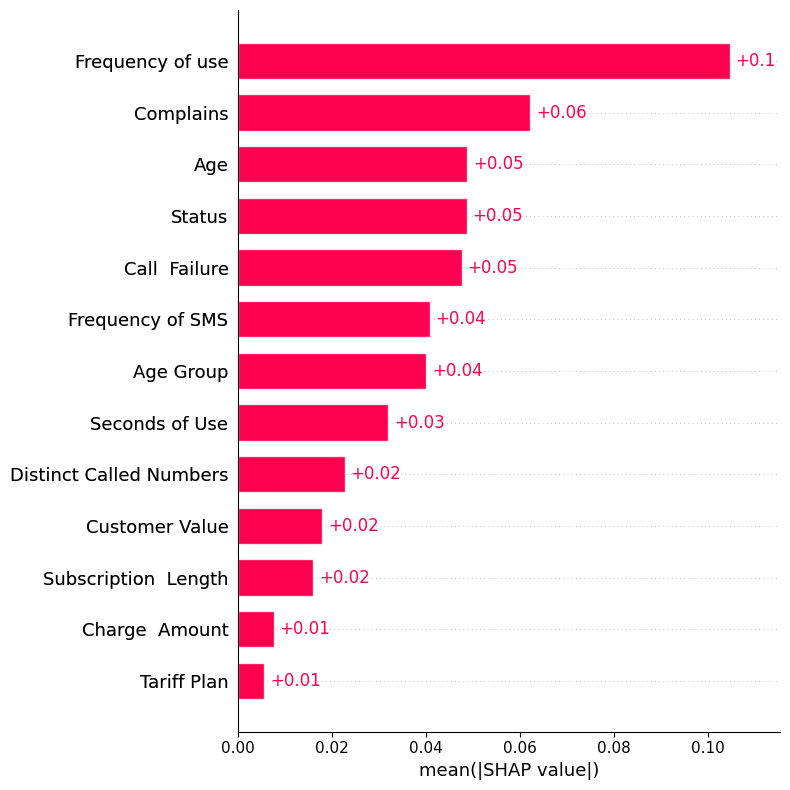

In [15]:
explanation = shap.Explanation(actual_prediction_shap_values, feature_names=X.columns)
shap.plots.bar(explanation, show=False, max_display=36)
plt.tight_layout()
plt.savefig(f"{plot_folder}/actual_prediction_mean_abs_shap_values.png", dpi=300)
plt.show()

In [17]:
cols_to_remove = [
    "Charge  Amount",
    "Tariff Plan",
]
cols_idx_to_remove = np.flatnonzero(np.isin(X.columns, cols_to_remove))
print(cols_idx_to_remove)

mask = np.ones(num_features, dtype=bool)
mask[cols_idx_to_remove] = False

[3 9]


In [18]:
new_X_train = X_train[:, mask]
new_X_test = X_test[:, mask]

In [19]:
new_models = []
new_y_train_preds, new_y_test_preds = [], []
new_acc_train, new_acc_test = [], []
new_prec_train, new_prec_test = [], []
new_rec_train, new_rec_test = [], []
new_f1_train, new_f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(new_X_train, y_train)
    models.append(model)

    y_train_pred = model.predict(new_X_train)
    y_test_pred = model.predict(new_X_test)
    
    new_y_train_preds.append(y_train_pred)
    new_y_test_preds.append(y_test_pred)

    new_acc_train.append(accuracy_score(y_train, y_train_pred))
    new_acc_test.append(accuracy_score(y_test, y_test_pred))
    new_prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    new_prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    new_rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    new_rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    new_f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    new_f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.892063       0.879365         0.886004   
1          (7,)        0.898413       0.890476         0.891281   
2        (7, 7)        0.944444       0.938095         0.943323   
3        (7, 2)        0.919444       0.907937         0.917944   
4    (13, 7, 2)        0.942063       0.926984         0.940232   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.870787      0.892063     0.879365        0.875813       0.856366  
1        0.883643      0.898413     0.890476        0.887397       0.873986  
2        0.935916      0.944444     0.938095        0.943732       0.935354  
3        0.905242      0.919444     0.907937        0.911201       0.896616  
4        0.923711      0.942063     0.926984        0.940518       0.923942  


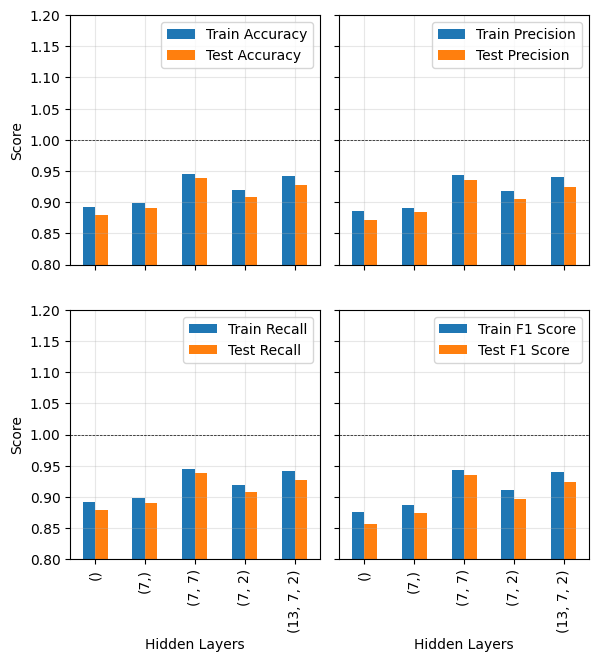

In [20]:
results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            new_acc_train,
            new_acc_test,
            new_prec_train,
            new_prec_test,
            new_rec_train,
            new_rec_test,
            new_f1_train,
            new_f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.8, 1.2), ylabel="Score"
    )
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.grid(alpha=0.3)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/new_scores.png", dpi=300)

In [21]:
for i, hidden_layer in enumerate(hidden_layers):
    matches_train = sum(
        old == new for old, new in zip(new_y_train_preds[i], y_train_preds[i])
    )
    size_train = len(y_train_preds[i])
    matches_test = sum(
        old == new for old, new in zip(new_y_test_preds[i], y_test_preds[i])
    )
    size_test = len(y_test_preds[i])
    print(f"Hidden Layer {hidden_layer}:")
    print(f"\tTrain Matches: {matches_train}/{size_train} ({matches_train/size_train*100:.2f}%)")
    print(f"\tTest Matches: {matches_test}/{size_test} ({matches_test/size_test*100:.2f}%)")

Hidden Layer ():
	Train Matches: 2515/2520 (99.80%)
	Test Matches: 628/630 (99.68%)
Hidden Layer (7,):
	Train Matches: 2464/2520 (97.78%)
	Test Matches: 618/630 (98.10%)
Hidden Layer (7, 7):
	Train Matches: 2440/2520 (96.83%)
	Test Matches: 607/630 (96.35%)
Hidden Layer (7, 2):
	Train Matches: 2411/2520 (95.67%)
	Test Matches: 606/630 (96.19%)
Hidden Layer (13, 7, 2):
	Train Matches: 2441/2520 (96.87%)
	Test Matches: 606/630 (96.19%)
